In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
application_data = pd.read_csv('D:\Моя учёба\ДИПЛОМ\моя нейросеть\credit_risk_dataset\credit_risk_dataset.csv')

In [9]:
application_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [10]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [11]:
application_data['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

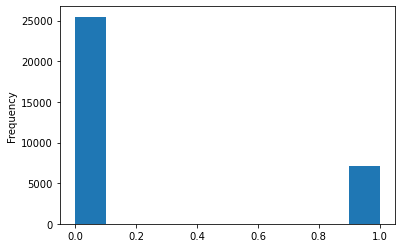

In [12]:
application_data['loan_status'].astype(int).plot(kind='hist')
plt.show()

In [13]:
def missing_values_table(df):
        # Общее число пустых значений
        mis_val = df.isnull().sum()
        
        # Процент пустых значений
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Создание таблицы
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Переименуем столбцы
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Количество пустых значений', 1 : '% пустых значений'})
        
        # Остортируем строки таблицы по % пустых значений
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% пустых значений', ascending=False).round(1)
        
        # Печать ощей информации
        print ("Ваша база данных имеет " + str(df.shape[1]) + " столбцов.\n"      
            "И в " + str(mis_val_table_ren_columns.shape[0]) +
              " из них есть пустые значения.")
    
        return mis_val_table_ren_columns
  

In [14]:
  missing_values = missing_values_table(application_data)
missing_values

Ваша база данных имеет 12 столбцов.
И в 2 из них есть пустые значения.


,Количество пустых значений,% пустых значений
loan_int_rate,3116,9.6
person_emp_length,895,2.7


In [15]:
application_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [16]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in application_data:
    if application_data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(application_data[col].unique())) <= 2:
            # Train on the training data
            le.fit(application_data[col])
            # Transform data
            application_data[col] = le.transform(application_data[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

1 columns were label encoded.


In [17]:
application_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4


In [18]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['person_home_ownership'])
dfbin = encoder.fit_transform(application_data['person_home_ownership'])
application_data = pd.concat([application_data, dfbin], axis = 1)
del application_data['person_home_ownership']
application_data.head()


D:\anaconda\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_0,person_home_ownership_1,person_home_ownership_2
0,22,59000,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3,0,0,1
1,21,9600,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2,0,1,0
2,25,9600,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3,0,1,1
3,23,65500,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2,0,0,1
4,24,54400,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4,0,0,1


In [19]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohe = ohc.fit_transform(application_data.loan_intent.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe, columns = ["loan_intent_"+str(ohc.categories_[0][i])
                                      for i in range(len(ohc.categories_[0]))])
application_data = pd.concat([application_data, dfOneHot], axis=1)
del application_data['loan_intent']
ohe1 = ohc.fit_transform(application_data.loan_grade.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe1, columns = ["loan_grade_"+str(ohc.categories_[0][i])
                                       for i in range(len(ohc.categories_[0]))])
application_data = pd.concat([application_data, dfOneHot], axis=1)
del application_data['loan_grade']
application_data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_0,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,35000,16.02,1,0.59,1,3,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24,54400,8.0,35000,14.27,1,0.55,1,4,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person_age                     32581 non-null  int64  
 1   person_income                  32581 non-null  int64  
 2   person_emp_length              31686 non-null  float64
 3   loan_amnt                      32581 non-null  int64  
 4   loan_int_rate                  29465 non-null  float64
 5   loan_status                    32581 non-null  int64  
 6   loan_percent_income            32581 non-null  float64
 7   cb_person_default_on_file      32581 non-null  int32  
 8   cb_person_cred_hist_length     32581 non-null  int64  
 9   person_home_ownership_0        32581 non-null  int64  
 10  person_home_ownership_1        32581 non-null  int64  
 11  person_home_ownership_2        32581 non-null  int64  
 12  loan_intent_DEBTCONSOLIDATION  32581 non-null 

In [21]:
correlations = application_data.corr()['loan_status'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 loan_grade_C                    -0.013031
person_home_ownership_0          0.012543
loan_intent_HOMEIMPROVEMENT      0.036607
loan_intent_MEDICAL              0.056595
loan_intent_DEBTCONSOLIDATION    0.071550
loan_grade_G                     0.082306
person_home_ownership_2          0.097484
loan_grade_F                     0.101841
loan_amnt                        0.105376
cb_person_default_on_file        0.179141
loan_grade_E                     0.180122
loan_grade_D                     0.318998
loan_int_rate                    0.335133
loan_percent_income              0.379366
loan_status                      1.000000
Name: loan_status, dtype: float64

Most Negative Correlations:
 person_home_ownership_1         -0.239886
loan_grade_A                    -0.201891
person_income                   -0.144449
loan_grade_B                    -0.092190
person_emp_length               -0.082489
loan_intent_VENTURE             -0.078274
loan_intent_EDUCATION    

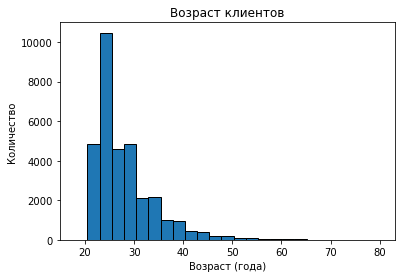

In [22]:
plt.hist(application_data['person_age'], edgecolor='k', bins=25,
         range=(18,80))
plt.title('Возраст клиентов')
plt.xlabel('Возраст (года)')
plt.ylabel('Количество')
plt.show()

In [25]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = application_data
ext_data_corrs = ext_data.corr()
ext_data_corrs

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_0,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.005807,0.859133,-0.008417,...,0.019858,0.033719,-0.012076,-0.007808,-0.005255,0.005166,0.007969,0.003677,0.008405,0.004912
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,-0.003613,0.117987,0.009551,...,-0.035806,0.013039,0.002321,0.005596,0.003104,-0.009248,-0.013766,0.013517,0.015228,0.007658
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,-0.027728,0.144699,-0.015561,...,-0.002599,0.010726,0.011450,0.052591,-0.005803,-0.040924,-0.007316,-0.017529,-0.011197,0.014501
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.039081,0.041967,0.013485,...,-0.024964,-0.001114,-0.000408,-0.116777,0.044145,-0.029533,0.070522,0.091877,0.070021,0.053377
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.501072,0.016696,0.017789,...,0.007131,-0.001883,-0.009010,-0.800991,-0.003408,0.375714,0.477857,0.324950,0.200542,0.127724
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,0.179141,-0.015529,0.012543,...,0.056595,-0.021094,-0.078274,-0.201891,-0.092190,-0.013031,0.318998,0.180122,0.101841,0.082306
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,0.035910,-0.031690,0.011697,...,0.012730,-0.004117,0.001455,-0.108772,0.032726,-0.000558,0.069007,0.058530,0.036735,0.030622
cb_person_default_on_file,0.005807,-0.003613,-0.027728,0.039081,0.501072,0.179141,0.035910,1.000000,0.004564,0.014264,...,-0.001758,-0.003331,-0.003478,-0.325287,-0.317961,0.427735,0.316682,0.140220,0.065327,0.044955
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,0.004564,1.000000,-0.006754,...,0.016225,0.035489,-0.008800,-0.010457,-0.003743,0.007508,0.008206,0.001105,0.006907,0.007100
person_home_ownership_0,-0.008417,0.009551,-0.015561,0.013485,0.017789,0.012543,0.011697,0.014264,-0.006754,1.000000,...,-0.004048,-0.000188,0.010179,-0.010710,-0.000370,-0.005664,0.013803,0.015305,0.007566,-0.002547


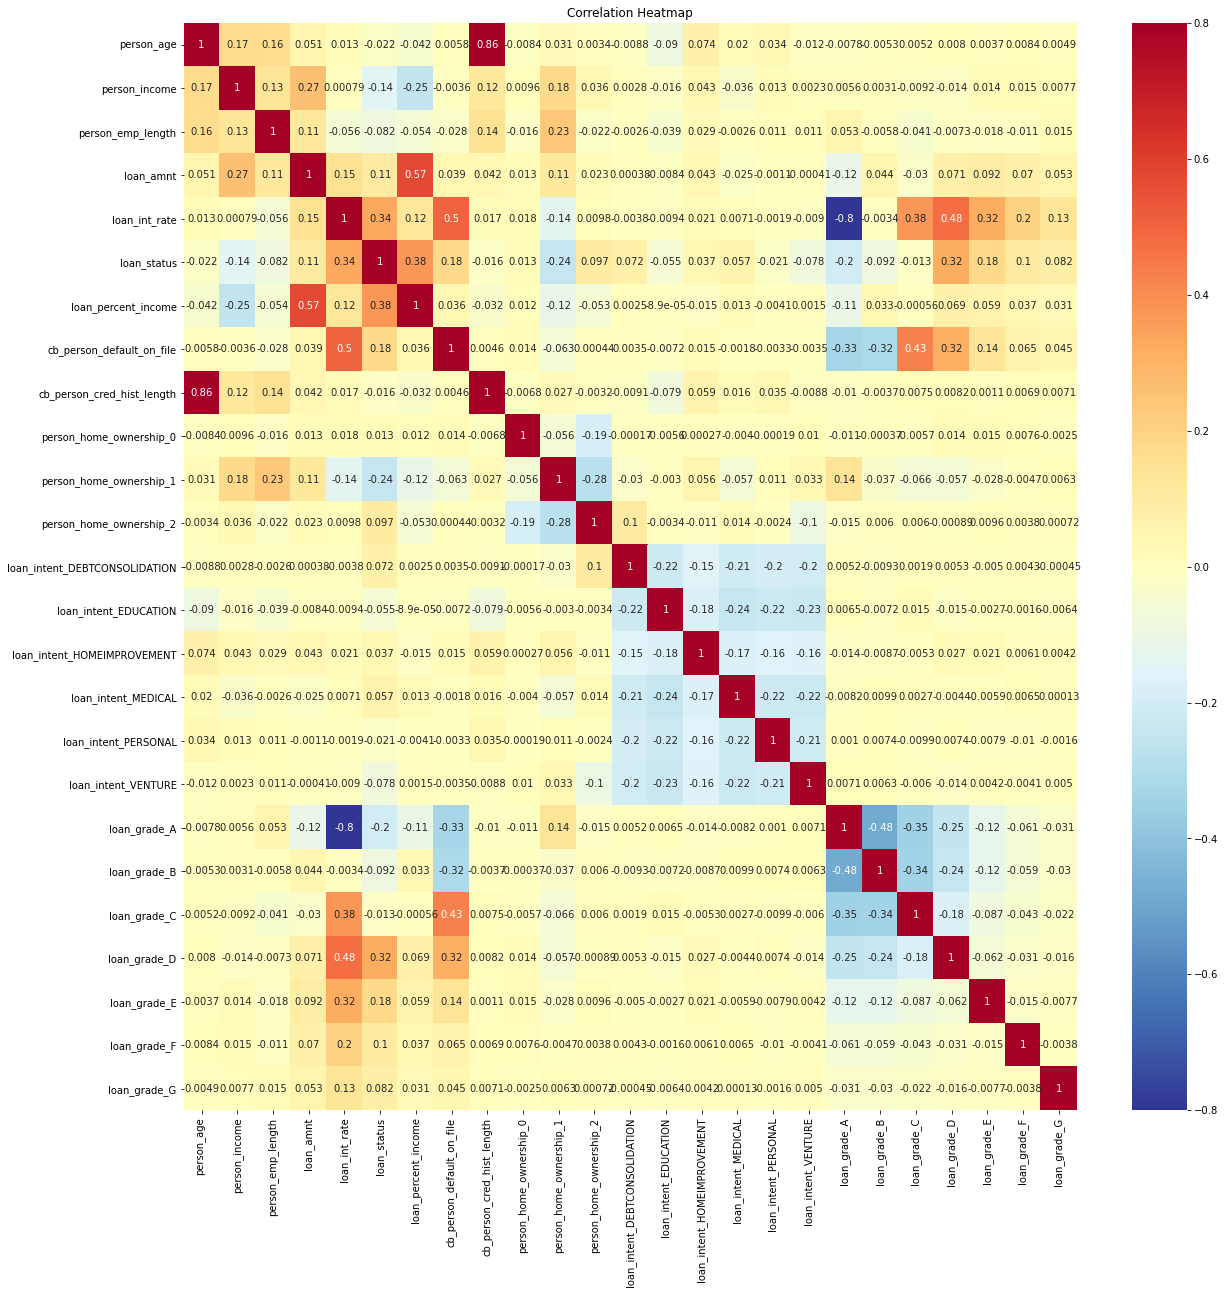

In [31]:
plt.figure(figsize = (20, 20))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.8, annot = True, vmax = 0.8)
plt.title('Correlation Heatmap');
plt.show()

In [84]:
application_data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_0,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,35000,16.02,1,0.59,1,3,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24,54400,8.0,35000,14.27,1,0.55,1,4,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [87]:
application_data.to_csv("data_train.csv", 
          sep = ";")